In [1]:
#compute the uDFT by noting DFT.DFT^* = D, a diagonal matrix, and factoring as D = RR^*, so uDFT = R^{-1}.DFT
#alternately, one could use unitary representations and normalization factors \sqrt{d_\rho/|G|}
#the resulting DFT will have signs \pm 1 on the diagonal DFT.DFT^* = S, which can be factored as s = rr^*, so S=RR^*
#again, uDFT = R^{-1}.DFT

In [1]:
#for u in GF(q), we can factor as u=aa^* using gen. z and modular arithmetic
def conj_square_root(u):
    if u == 0:
        return 0  # Special case for 0
    z = F.multiplicative_generator()
    k = u.log(z)  # Compute discrete log of u to the base z
    if k % (q+1) != 0:
        raise ValueError("Unable to factor: u is not in base field GF(q)")
    return z ** ((k//(q+1))%(q-1))

In [2]:
#compute the uDFT by noting DFT.DFT^* = D, a diagonal matrix, and factoring as D = RR^*, so uDFT = R^{-1}.DFT
def unitary_dft():
    dft_matrix = SGA.dft()
    sign_diag = (dft_matrix*dft_matrix.H).diagonal()
    factor_diag_inv = diagonal_matrix([~conj_square_root(d) for d in sign_diag])
    return factor_diag_inv*dft_matrix

In [92]:
#parameters and define the symmetric group algebra
n = 4; q = 7
F = GF(q**2)
SGA = SymmetricGroupAlgebra(F,n)
assert F.characteristic() > 0, "F must have positive characteristic"
if not (F.is_field() and F.is_finite() and F.order().is_square()):
    raise ValueError("the base ring must be a finite field of square order")
if F.characteristic().divides(SGA.group().cardinality()):
    raise NotImplementedError("not implemented when p|n!; dimension of invariant forms may be greater than one")

In [166]:
#converting the unitary DFT over finite fields to a complex matrix using the root of unity map
U = unitary_dft();

In [77]:
#check that U is unitary over a finite field
U*U.H == 1

True

In [165]:
#given a multiplicative generator `z` of the finite field, the discrete_log is the exponent of the generator
#the discrete_log of zero is -infinity, which we set to -1 for convenience since all other values are nonnegative
discrete_log = lambda F, x: x.log(F.multiplicative_generator()) if x != 0 else -1

In [167]:
#compute the discrete log of each entry of U
log_U = U.apply_map(lambda x: discrete_log(F,x))

In [168]:
U

24 x 24 dense matrix over Finite Field in z2 of size 7^2 (use the '.str()' method to see the entries)

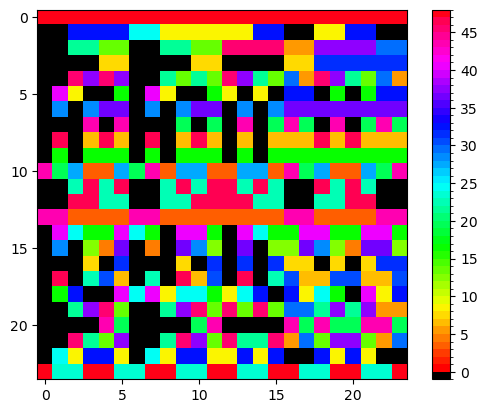

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

cmap = plt.cm.hsv  # Get the HSV colormap
new_colors = np.vstack(([0, 0, 0, 1], cmap(np.linspace(0, 1, F.order()))))  # Add black as the first color
custom_cmap = ListedColormap(new_colors) # create a new custom colormap
norm = BoundaryNorm([-1]+[i for i in range(F.order())], custom_cmap.N)  # Maps -1 to black, 0 to the first color of HSV

# Plotting the data
plt.imshow(log_U, cmap=custom_cmap, norm=norm, interpolation="nearest")
plt.colorbar()
plt.show()

In [170]:
#the map from modular representation theory to compute Brauer characters from F_q --> \C giving roots of unity
brauer_map = lambda a, F: 0 if a == 0 else exp(2*pi*I*a.log(F.multiplicative_generator())/(F.order()-1))

In [194]:
#complexify the uDFT matrix over F_q using the Brauer map
U_complex = matrix(CC,U.apply_map(lambda a: brauer_map(a,F)))

In [172]:
#compute the Gram matrix, taking inner products of rows and columns w.r.t conjugate inner product
gram = U_complex*U_complex.H

In [173]:
#function to round each component of a complex number 
def round_complex(z, digits):
    if z.imag_part():
        return round(z.real_part(), digits) + round(z.imag_part(), digits) * I
    return round(z, digits)

In [174]:
#round the (complex) Gram matrix to three decimal places
gram_rounded = gram.apply_map(lambda u:round_complex(u,3))

In [175]:
#plot the complexified version of the uDFT matrix over a finite field
def plot_complex(U_complex):
    U_arg = U_complex.apply_map(lambda x: arg(x))  # find the argument of each element
    return matrix_plot(U_arg, cmap='hsv', colorbar=True)  # plot the matrix

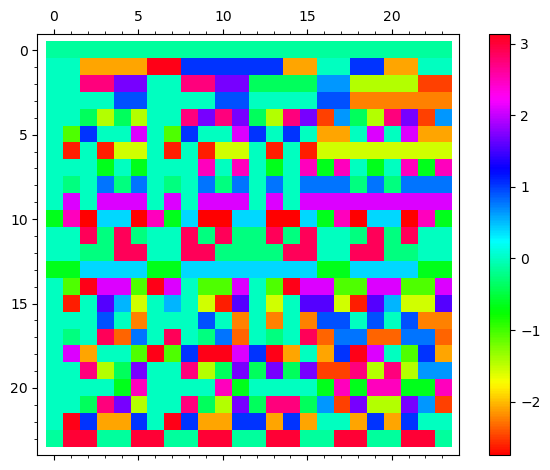

In [176]:
#plot the complexified version of the uDFT matrix over a finite field
plot_complex(U_complex)

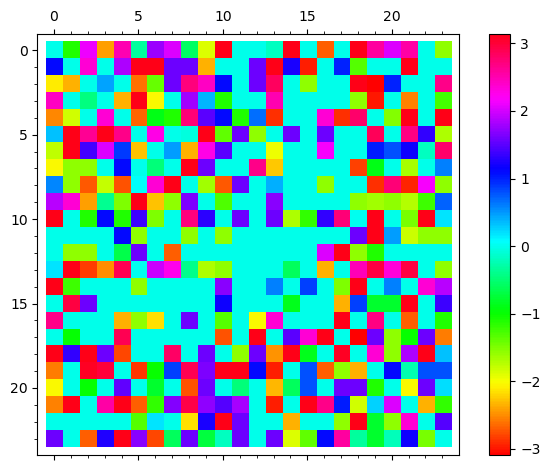

In [177]:
#plot the result of U_complex*U_complex.H to see how far it is from being unitary over the complex numbers
plot_complex(gram)

In [178]:
#compute the eigenvalues of the uDFT matrix
eigenvalues = U.eigenvalues(); eigenvalues

[6, 5*z2 + 3, 4*z14^13 + 6*z14^12 + 4*z14^11 + 5*z14^10 + 4*z14^8 + 3*z14^6 + 3*z14^5 + 5*z14^4 + z14^3 + 4*z14^2 + 4*z14 + 1, 2*z14^13 + z14^12 + 2*z14^11 + 5*z14^10 + 6*z14^8 + 2*z14^7 + 6*z14^6 + 5*z14^5 + 4*z14^4 + 3*z14^3 + 3*z14^2 + 4*z14 + 2, z14^13 + 2*z14^12 + 2*z14^11 + 4*z14^10 + 4*z14^9 + 2*z14^6 + z14^3 + 2*z14 + 3, z14^13 + 4*z14^12 + 3*z14^11 + 5*z14^10 + z14^9 + 5*z14^6 + 4*z14^5 + 5*z14^4 + 5*z14^3 + z14^2 + 5*z14 + 3, 3*z14^13 + 6*z14^12 + z14^11 + 3*z14^10 + 4*z14^9 + 6*z14^7 + 5*z14^6 + 3*z14^5 + 6*z14^4 + 2*z14^3 + 4*z14 + 5, 2*z14^13 + 2*z14^12 + z14^11 + 3*z14^9 + 3*z14^8 + 3*z14^7 + 5*z14^5 + 4*z14^4 + 2*z14^3 + 4*z14^2 + 4*z14 + 6, 6*z14^13 + 3*z14^12 + 6*z14^11 + 2*z14^9 + 4*z14^8 + 5*z14^6 + 4*z14^5 + z14^4 + 3*z14^3 + 3*z14^2, 6*z30^29 + 3*z30^28 + 6*z30^27 + 2*z30^25 + 3*z30^24 + 3*z30^23 + 5*z30^22 + 3*z30^21 + 4*z30^20 + 4*z30^19 + 2*z30^17 + 6*z30^16 + 4*z30^15 + 6*z30^14 + 4*z30^12 + 3*z30^11 + 4*z30^10 + 6*z30^9 + 6*z30^8 + 5*z30^7 + 5*z30^6 + 4*z30^5 

In [179]:
#compute the multiplicity of each eigenvalue. check if all eigenvalues are distinct
from collections import Counter
multiplicities = Counter(eigenvalues)
all_unique = all(count == 1 for count in multiplicities.values()); all_unique

True

In [180]:
#compute the charpoly of the uDFT matrix 
minpoly = U.minimal_polynomial(); minpoly

x^24 + z2*x^23 + (2*z2 + 2)*x^22 + (4*z2 + 4)*x^21 + (2*z2 + 6)*x^20 + 4*z2*x^19 + 2*z2*x^18 + (4*z2 + 3)*x^17 + (4*z2 + 6)*x^16 + (5*z2 + 2)*x^15 + 2*z2*x^14 + (6*z2 + 2)*x^13 + 5*z2*x^11 + (z2 + 5)*x^10 + (z2 + 1)*x^9 + z2*x^8 + (5*z2 + 5)*x^7 + (z2 + 5)*x^6 + (2*z2 + 3)*x^5 + 2*x^4 + (6*z2 + 1)*x^3 + (3*z2 + 4)*x^2 + (4*z2 + 6)*x + z2 + 3

In [207]:
#compute a splitting field of the characteristic polynomial
L = charpoly.splitting_field('a'); print(L)
K = GF(q**30); print(K)
print(K.multiplicative_generator().minimal_polynomial())

Finite Field in a of size 7^210
Finite Field in z30 of size 7^30
x^30 + x^22 + 4*x^21 + 4*x^20 + x^19 + 4*x^18 + x^16 + 2*x^15 + 3*x^14 + 6*x^13 + 5*x^12 + 2*x^11 + 3*x^10 + 3*x^9 + 2*x^8 + 4*x^7 + 2*x^6 + 3*x^5 + x^3 + 5*x^2 + 2*x + 3


In [182]:
#compute the eigenvalues over a specific field K rather than using the algebraic closure
eigenvalues_K = matrix(K,U).eigenvalues(extend=False)

In [188]:
#compute the discrete log of the eigenvalues
log_eigenvalues = list(map(lambda x: discrete_log(K,x), eigenvalues_K)); log_eigenvalues

[11269670145346129043931624,
 19569211138526239672164486,
 20790904065162128909891334,
 6379196630969910098252790,
 424304164595145487956966,
 14087087681682661304914530,
 14785335754071908710154310,
 13690777798835597759922054,
 3222562647371267985937254,
 16861256861612106119861862,
 17207243712868805688146454,
 22520742049785640274165718,
 21628026486267985216684278,
 12239053578710904245803398,
 4483986111792702630829206,
 130187686346324695882710,
 9199351174957929468236070]

In [201]:
#compute the complexified eigenvalue
complex_eigenvalues = [brauer_map(eig,K) for eig in eigenvalues_K]

In [198]:
import matplotlib.pyplot as plt
import numpy as np

# Extract real and imaginary parts for plotting
real_parts = [eig.real() for eig in complex_eigenvalues]
imaginary_parts = [eig.imag() for eig in complex_eigenvalues]

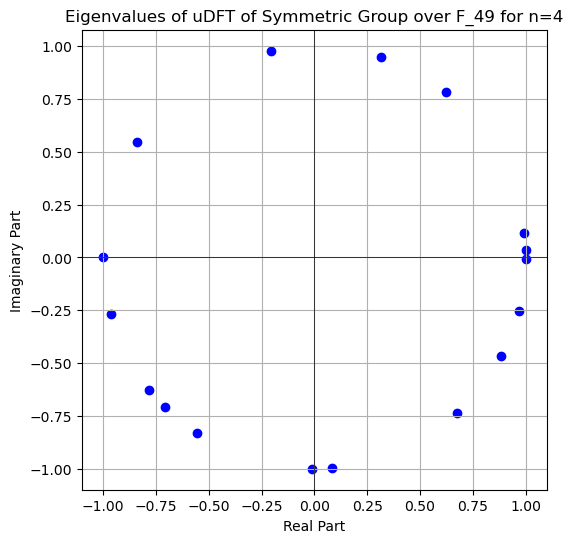

In [200]:
# Plotting the eigenvalues on the complex plane
plt.figure(figsize=(6,6))
plt.scatter(real_parts, imaginary_parts, color='blue', label="Eigenvalues")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f'Eigenvalues of uDFT of Symmetric Group over F_{q**2} for n={n}')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid(True)
plt.show()

In [229]:
#compute the eigenvectors over a splitting field
D, P = matrix(L,U).eigenmatrix_right()

In [233]:
print(P)

[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [243]:
discrete_log(L,P[1,0])

1723872719529775255168233477739808705550682172067583351531515002896576794274699331456573828897879671480606241901141153738537923622099791332217469260702699225221018982963916207228